In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

df = pd.read_csv("raw_data/bronze_train.csv")

In [157]:
df.isna().sum()

unit            0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
T2              0
T24             0
T30             0
T50             0
P2              0
P15             0
P30             0
Nf              0
Nc              0
epr             0
Ps30            0
phi             0
NRf             0
NRc             0
BPR             0
farB            0
htBleed         0
Nf_dmd          0
PCNfR_dmd       0
W31             0
W32             0
failure_type    0
dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unit          160359 non-null  int64  
 1   cycle         160359 non-null  int64  
 2   op_setting_1  160359 non-null  float64
 3   op_setting_2  160359 non-null  float64
 4   op_setting_3  160359 non-null  float64
 5   T2            160359 non-null  float64
 6   T24           160359 non-null  float64
 7   T30           160359 non-null  float64
 8   T50           160359 non-null  float64
 9   P2            160359 non-null  float64
 10  P15           160359 non-null  float64
 11  P30           160359 non-null  float64
 12  Nf            160359 non-null  float64
 13  Nc            160359 non-null  float64
 14  epr           160359 non-null  float64
 15  Ps30          160359 non-null  float64
 16  phi           160359 non-null  float64
 17  NRf           160359 non-null  float64
 18  NRc 

In [159]:
df.duplicated().sum()

np.int64(0)

In [160]:
list(df.columns)

Sensor_dic = {
    'T2': 'Fan Inlet Temperature (°R)',
    'T24': 'LPC Outlet Temperature (°R)',
    'T30': 'HPC Outlet Temperature (°R)',
    'T50': 'LPT Outlet Temperature (°R)',
    'P2': 'Fan Inlet Pressure (psia)',
    'P15': 'Bypass-Duct Pressure (psia)',
    'P30': 'HPC Outlet Pressure (psia)',
    'Nf': 'Physical Fan Speed (rpm)',
    'Nc': 'Physical Core Speed (rpm)',
    'epr': 'Engine Pressure Ratio (P50/P2)',
    'Ps30': 'HPC Outlet Static Pressure (psia)',
    'phi': 'Ratio of Fuel Flow to Ps30 (pps/psia)',
    'NRf': 'Corrected Fan Speed (rpm)',
    'NRc': 'Corrected Core Speed (rpm)',
    'BPR': 'Bypass Ratio',
    'farB': 'Burner Fuel-Air Ratio',
    'htBleed': 'Bleed Enthalpy',
    'Nf_dmd': 'Required Fan Speed',
    'PCNfR_dmd': 'Required Fan Conversion Speed',
    'W31': 'High-Pressure Turbines Cool Air Flow',
    'W32': 'Low-Pressure Turbines Cool Air Flow'
}

In [161]:
df = pd.read_parquet("datamart/silver/silver_feature.parquet")

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit          20631 non-null  int32  
 1   cycle         20631 non-null  int32  
 2   op_setting_1  20631 non-null  float32
 3   op_setting_2  20631 non-null  float32
 4   op_setting_3  20631 non-null  float32
 5   T2            20631 non-null  float32
 6   T24           20631 non-null  float32
 7   T30           20631 non-null  float32
 8   T50           20631 non-null  float32
 9   P2            20631 non-null  float32
 10  P15           20631 non-null  float32
 11  P30           20631 non-null  float32
 12  Nf            20631 non-null  float32
 13  Nc            20631 non-null  float32
 14  epr           20631 non-null  float32
 15  Ps30          20631 non-null  float32
 16  phi           20631 non-null  float32
 17  NRf           20631 non-null  float32
 18  NRc           20631 non-nu

In [163]:
df.shape

(20631, 26)

In [164]:
df.head()

unit  cycle  op_setting_1  op_setting_2  op_setting_3          T2  \
0     1      1       -0.0007       -0.0004         100.0  518.669983   
1     1      2        0.0019       -0.0003         100.0  518.669983   
2     1      3       -0.0043        0.0003         100.0  518.669983   
3     1      4        0.0007        0.0000         100.0  518.669983   
4     1      5       -0.0019       -0.0002         100.0  518.669983   

          T24          T30          T50     P2  ...         phi          NRf  \
0  641.820007  1589.699951  1400.599976  14.62  ...  521.659973  2388.020020   
1  642.150024  1591.819946  1403.140015  14.62  ...  522.280029  2388.070068   
2  642.349976  1587.989990  1404.199951  14.62  ...  522.419983  2388.030029   
3  642.349976  1582.790039  1401.869995  14.62  ...  522.859985  2388.080078   
4  642.369995  1582.849976  1406.219971  14.62  ...  522.190002  2388.040039   

           NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd        W31        W32  
0  8138.620117  8.4195  0.03    392.0  2388.0      100.0  39.060001  23.419001  
1  8131.490234  8.4318  0.03    392.0  2388.0      100.0  39.000000  23.423599  
2  8133.229980  8.4178  0.03    390.0  2388.0      100.0  38.950001  23.344200  
3  8133.830078  8.3682  0.03    392.0  2388.0      100.0  38.880001  23.373899  
4  8133.799805  8.4294  0.03    393.0  2388.0      100.0  38.900002  23.404400  

[5 rows x 26 columns]

In [165]:
df.columns

Index(['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'T2',
       'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd',
       'W31', 'W32'],
      dtype='object')

In [166]:
df.loc[:,['unit','cycle']].describe()

unit         cycle
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

Interpretation: 

When we inspect the descriptive statistics of the unit and cycle columns, we see that the dataset contains a total of 160,359 rows.

There are 709 engines in total, with unit numbers ranging from 1 to 709. The mean unit number (370.27) and the quartiles (25% = 196, 50% = 381, 75% = 547) indicate that the data is fairly well distributed across all engines, though each unit may have a different number of recorded cycles before failure.

The cycle column represents the number of operational cycles the engine has completed up to failure. On average, engines operate for about 123.33 cycles before failing. However, there is a large variation across engines, with a standard deviation of 83.54 cycles. The shortest-lived engine failed after just 1 cycle, while the longest-running engine reached 543 cycles before failure.

The quartiles (25% = 57, 50% = 114, 75% = 173) show that half of the engines failed between roughly 57 and 173 cycles. The large gap between the minimum and maximum values suggests that some engines fail much earlier or later than most — likely due to differences in operating conditions, loads, or inherent variability in performance.

This wide spread implies outliers on both ends — engines that failed unusually early or lasted much longer than the majority. A visualization of the cycle distribution will help further illustrate these differences in engine lifespan.

In [167]:
sensor_columns = [
    'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 
    'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 
    'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'
]

# descriptive statistics (transposed)
df_stats = df.loc[:, sensor_columns].describe().transpose()

# display the table
df_stats

count         mean        std          min          25%  \
T2         20631.0   518.669983   0.000000   518.669983   518.669983   
T24        20631.0   642.680908   0.500053   641.210022   642.325012   
T30        20631.0  1590.523071   6.131150  1571.040039  1586.260010   
T50        20631.0  1408.933716   9.000605  1382.250000  1402.359985   
P2         20631.0    14.619998   0.000000    14.620000    14.620000   
P15        20631.0    21.609802   0.001389    21.600000    21.610001   
P30        20631.0   553.367737   0.885092   549.849976   552.809998   
Nf         20631.0  2388.096680   0.070965  2387.899902  2388.050049   
Nc         20631.0  9065.243164  22.082880  9021.730469  9053.099609   
epr        20631.0     1.300000   0.000000     1.300000     1.300000   
Ps30       20631.0    47.541168   0.267087    46.849998    47.349998   
phi        20631.0   521.413513   0.737554   518.690002   520.960022   
NRf        20631.0  2388.096436   0.071899  2387.879883  2388.040039   
NRc        20631.0  8143.752441  19.076178  8099.939941  8133.245117   
BPR        20631.0     8.442145   0.037505     8.324900     8.414900   
farB       20631.0     0.030000   0.000000     0.030000     0.030000   
htBleed    20631.0   393.210663   1.548763   388.000000   392.000000   
Nf_dmd     20631.0  2388.000000   0.000000  2388.000000  2388.000000   
PCNfR_dmd  20631.0   100.000000   0.000000   100.000000   100.000000   
W31        20631.0    38.816273   0.180746    38.139999    38.700001   
W32        20631.0    23.289707   0.108251    22.894199    23.221800   

                   50%          75%          max  
T2          518.669983   518.669983   518.669983  
T24         642.640015   643.000000   644.530029  
T30        1590.099976  1594.380005  1616.910034  
T50        1408.040039  1414.555054  1441.489990  
P2           14.620000    14.620000    14.620000  
P15          21.610001    21.610001    21.610001  
P30         553.440002   554.010010   556.059998  
Nf         2388.090088  2388.139893  2388.560059  
Nc         9060.660156  9069.419922  9244.589844  
epr           1.300000     1.300000     1.300000  
Ps30         47.509998    47.700001    48.529999  
phi         521.479980   521.950012   523.380005  
NRf        2388.090088  2388.139893  2388.560059  
NRc        8140.540039  8148.310059  8293.719727  
BPR           8.438900     8.465600     8.584800  
farB          0.030000     0.030000     0.030000  
htBleed     393.000000   394.000000   400.000000  
Nf_dmd     2388.000000  2388.000000  2388.000000  
PCNfR_dmd   100.000000   100.000000   100.000000  
W31          38.830002    38.950001    39.430000  
W32          23.297899    23.366800    23.618401

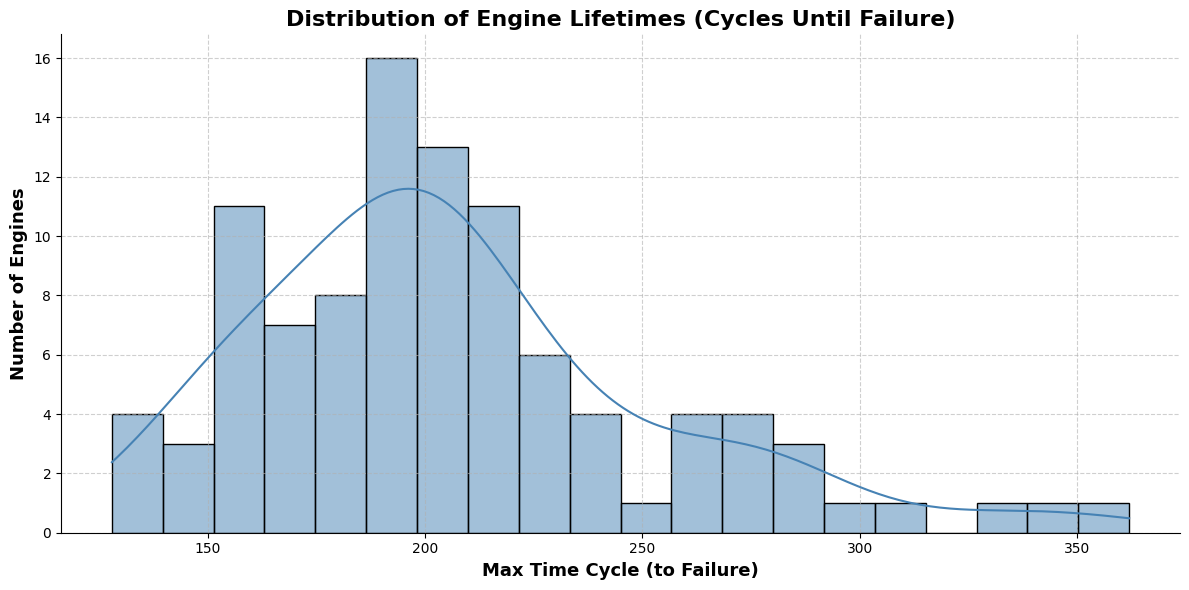

In [168]:
# Group by each engine and find its max cycle (i.e., cycle at failure)
max_time_cycles = df.groupby('unit')[['cycle']].max()

# Distribution of maximum time cycles (engine lifetimes)
sns.displot(
    max_time_cycles['cycle'],
    kde=True,        # adds a smooth density curve
    bins=20,         # number of bins for histogram
    height=6,        # figure height
    aspect=2,        # width-to-height ratio
    color='steelblue'
)

plt.title('Distribution of Engine Lifetimes (Cycles Until Failure)', fontweight='bold', fontsize=16)
plt.xlabel('Max Time Cycle (to Failure)', fontweight='bold', fontsize=13)
plt.ylabel('Number of Engines', fontweight='bold', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Interpretation:

The histogram shows that most engines fail between 150–250 cycles, with a peak around 200 cycles. The distribution is right-skewed, indicating that while most engines fail early, a few last much longer — exceeding 500 cycles.

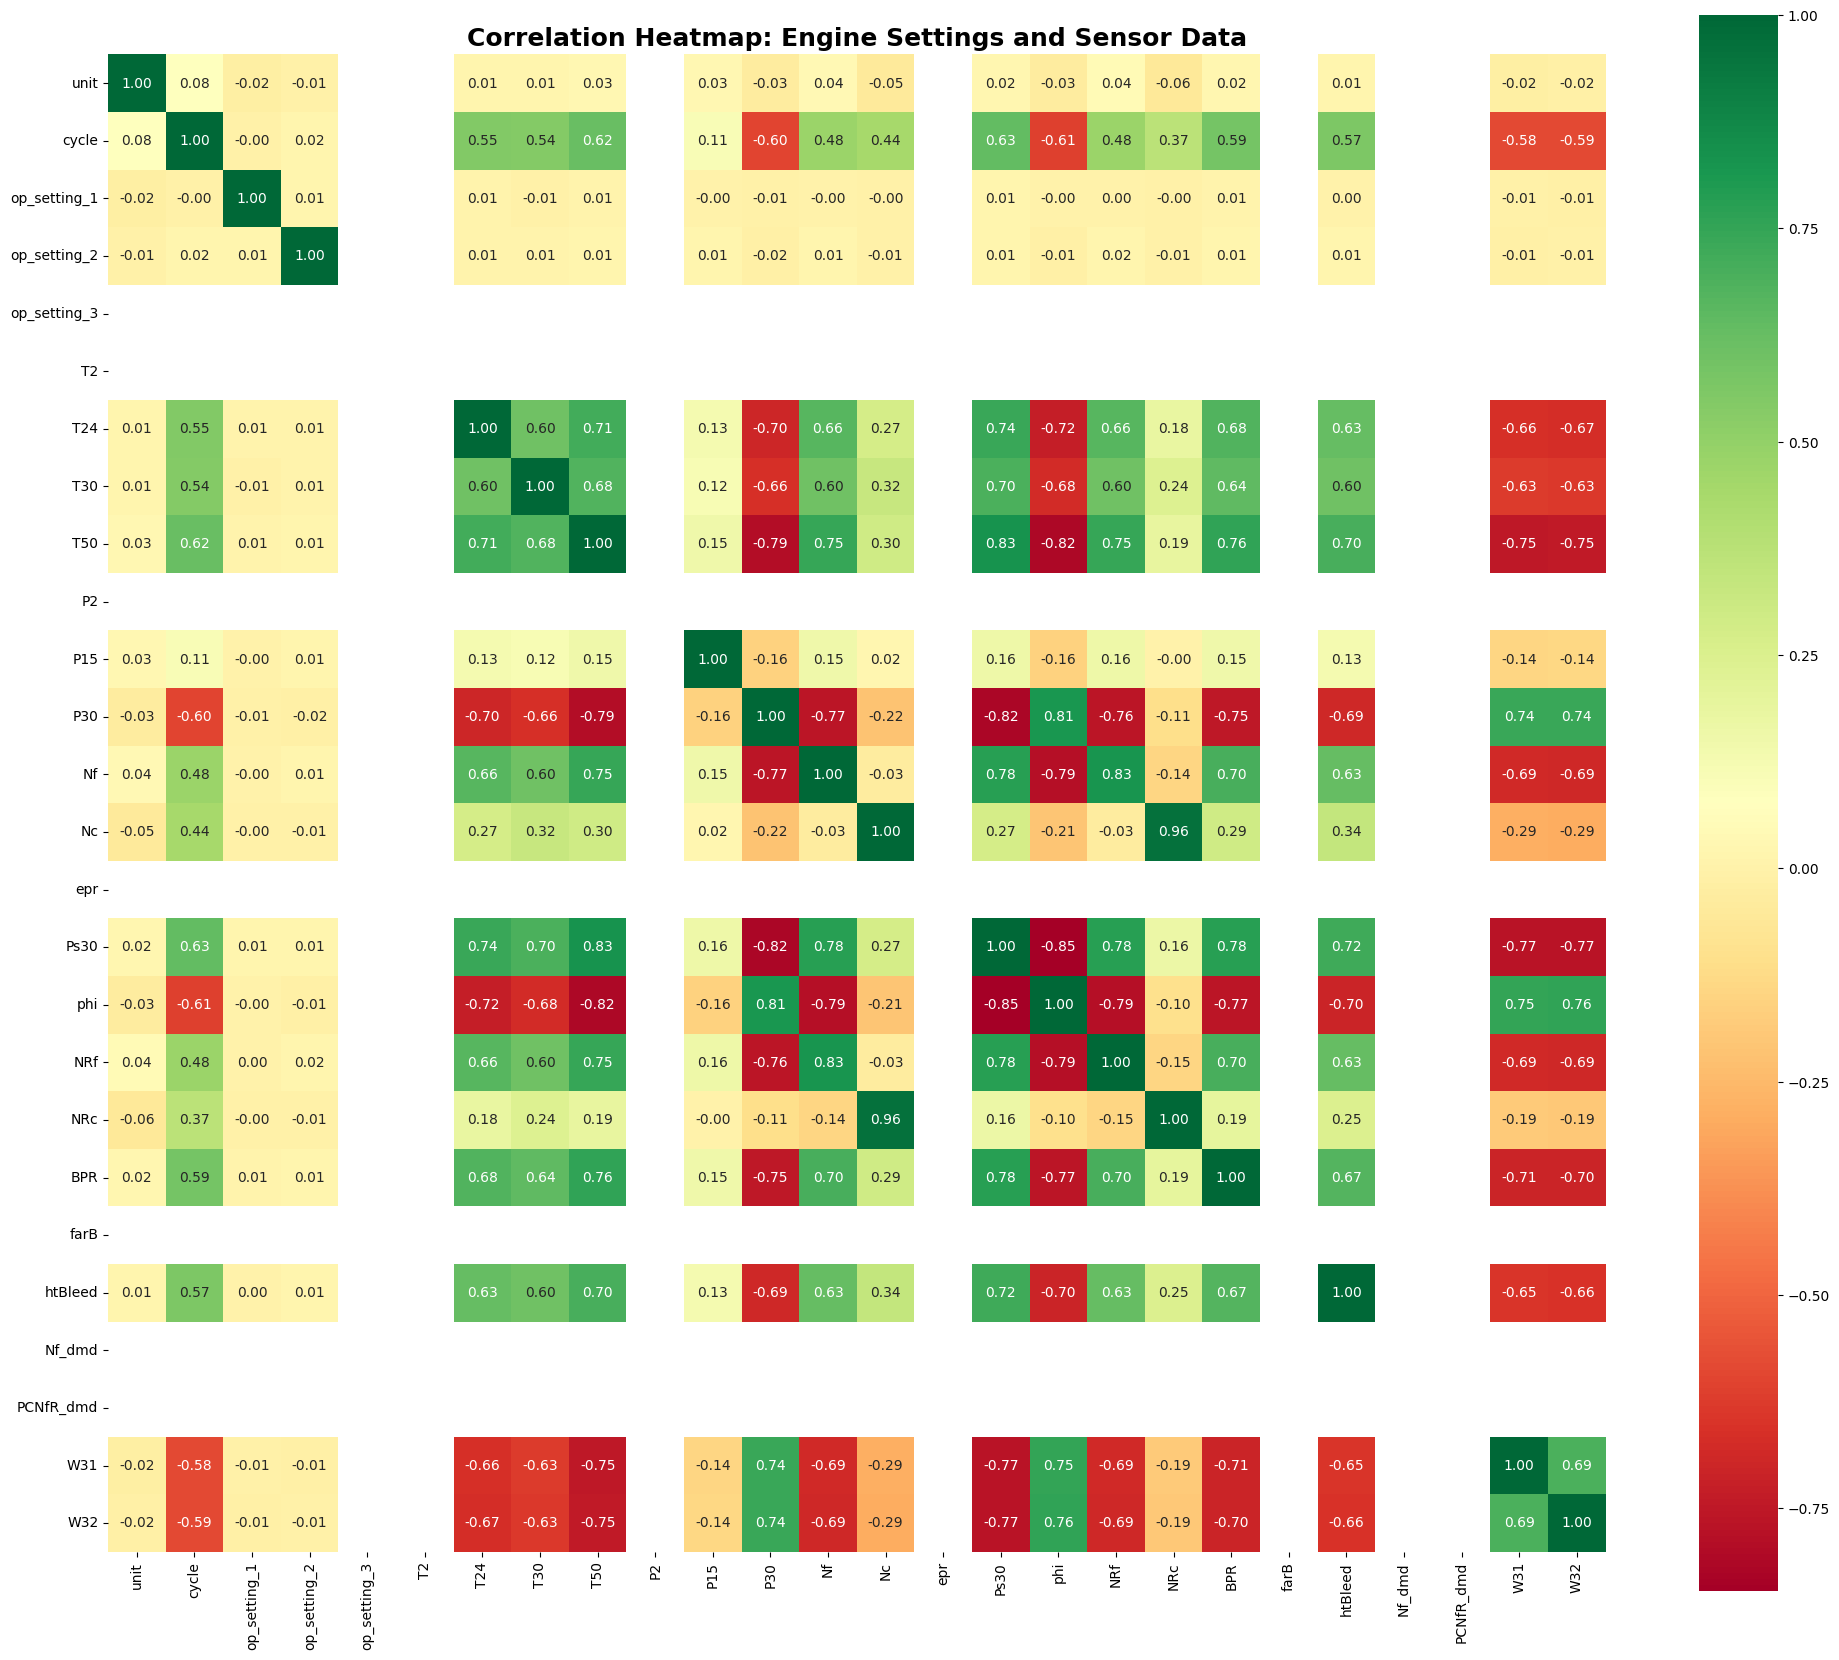

In [169]:
# Define your selected columns
sensor_columns = [
    'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 
    'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 
    'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'
]

# Include unit, cycle, and operation settings
selected_columns = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + sensor_columns

# Compute correlation matrix for selected columns only
corr = df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr,
    annot=True,       # show correlation values
    fmt=".2f",        # format decimals
    cmap='RdYlGn',    # color palette
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap: Engine Settings and Sensor Data", fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()

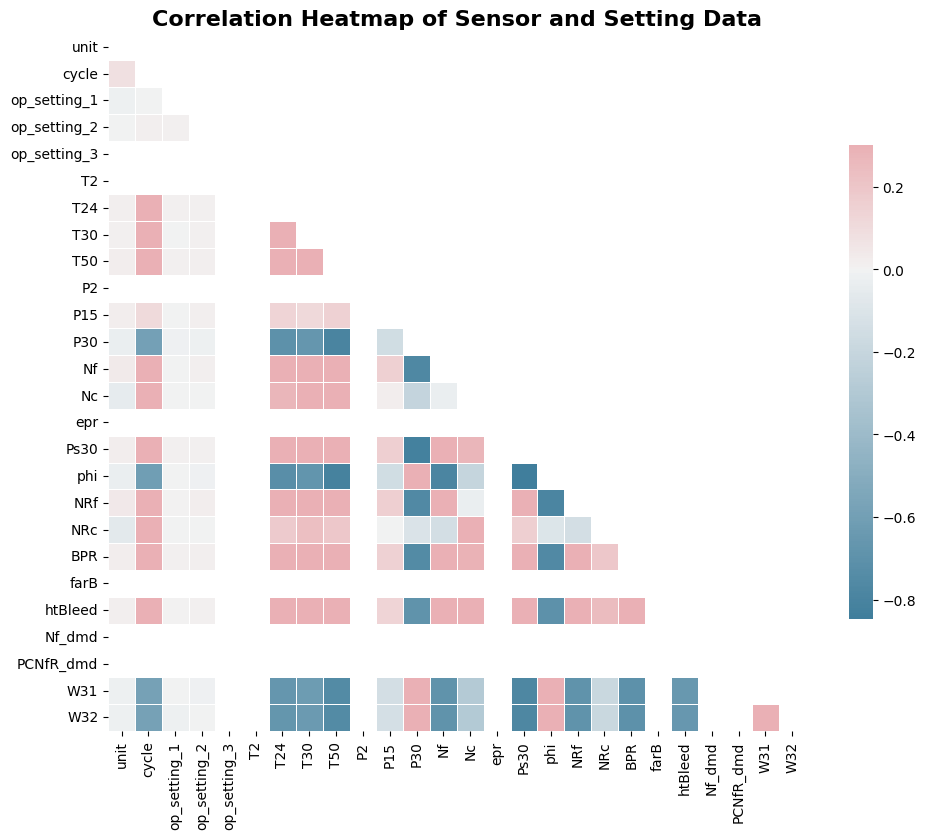

Top 20 Most Correlated Feature Pairs:
NRc   Nc      0.963157
Nc    NRc     0.963157
Ps30  phi    -0.846884
phi   Ps30   -0.846884
T50   Ps30    0.830136
Ps30  T50     0.830136
NRf   Nf      0.826082
Nf    NRf     0.826082
Ps30  P30    -0.822805
P30   Ps30   -0.822805
T50   phi    -0.815591
phi   T50    -0.815591
      P30     0.812713
P30   phi     0.812713
T50   P30    -0.793130
P30   T50    -0.793130
NRf   phi    -0.788429
phi   NRf    -0.788429
Nf    phi    -0.786527
phi   Nf     -0.786527
dtype: float64


In [170]:
# Compute correlation matrix (numeric columns only)
corr = df.select_dtypes(include=[np.number]).corr()

# Create a mask for the upper triangle (to make it cleaner)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure
plt.figure(figsize=(10, 10))

# Choose color palette
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title("Correlation Heatmap of Sensor and Setting Data", fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Compute correlation matrix (numeric columns only)
corr = df.select_dtypes(include=[np.number]).corr()

# Unstack, sort by absolute correlation, and drop self-correlations
corr_pairs = corr.unstack().sort_values(key=abs, ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # remove self-correlation (1.0)

# Get top 20 strongest correlations
top20_corr = corr_pairs.head(20)

# Print results
print("Top 20 Most Correlated Feature Pairs:")
print(top20_corr)

In [ ]:
#dropping highly correlated features
cols_to_drop_corr = ["NRc", "NRf", "Ps30"]
df = df.drop(columns=[c for c in cols_to_drop_corr if c in df.columns])


In [172]:
#Compute RUL to do EDA

# Compute RUL correctly for each engine (unit)
def add_RUL_column(df):
    # Compute RUL directly within each group using transform
    df['RUL'] = df.groupby('unit')['cycle'].transform(lambda x: x.max() - x)
    return df

# Apply function
df = add_RUL_column(df)

# Check result df.head()
df.head()

# Check that the last cycle per engine has RUL = 0
print(df.groupby('unit')['RUL'].describe())

      count   mean        std  min    25%    50%     75%    max
unit                                                           
1     192.0   95.5  55.569776  0.0  47.75   95.5  143.25  191.0
2     287.0  143.0  82.993976  0.0  71.50  143.0  214.50  286.0
3     179.0   89.0  51.816986  0.0  44.50   89.0  133.50  178.0
4     189.0   94.0  54.703748  0.0  47.00   94.0  141.00  188.0
5     269.0  134.0  77.797815  0.0  67.00  134.0  201.00  268.0
...     ...    ...        ...  ...    ...    ...     ...    ...
96    336.0  167.5  97.139076  0.0  83.75  167.5  251.25  335.0
97    202.0  100.5  58.456537  0.0  50.25  100.5  150.75  201.0
98    156.0   77.5  45.177428  0.0  38.75   77.5  116.25  155.0
99    185.0   92.0  53.549043  0.0  46.00   92.0  138.00  184.0
100   200.0   99.5  57.879185  0.0  49.75   99.5  149.25  199.0

[100 rows x 8 columns]


In [173]:
# Get the index of the last cycle (where RUL = 0) for each unit
last_indices = df.groupby('unit')['RUL'].idxmin()

# Select those rows from the original dataframe
max_rul_u = df.loc[last_indices].reset_index(drop=True)

# Check results
max_rul_u[['unit', 'cycle', 'RUL']].head()

unit  cycle  RUL
0     1    192    0
1     2    287    0
2     3    179    0
3     4    189    0
4     5    269    0

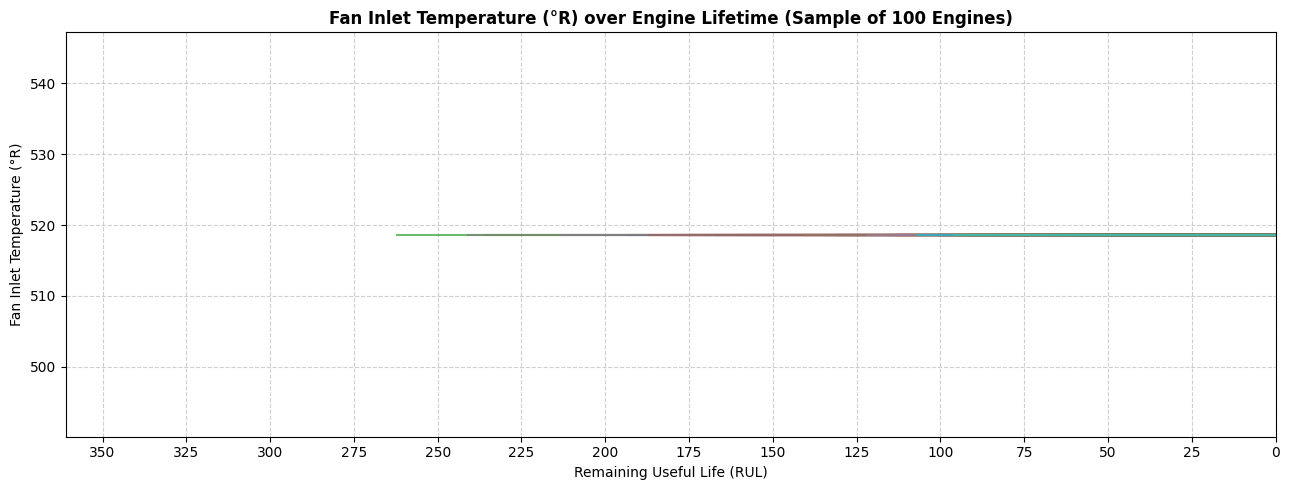

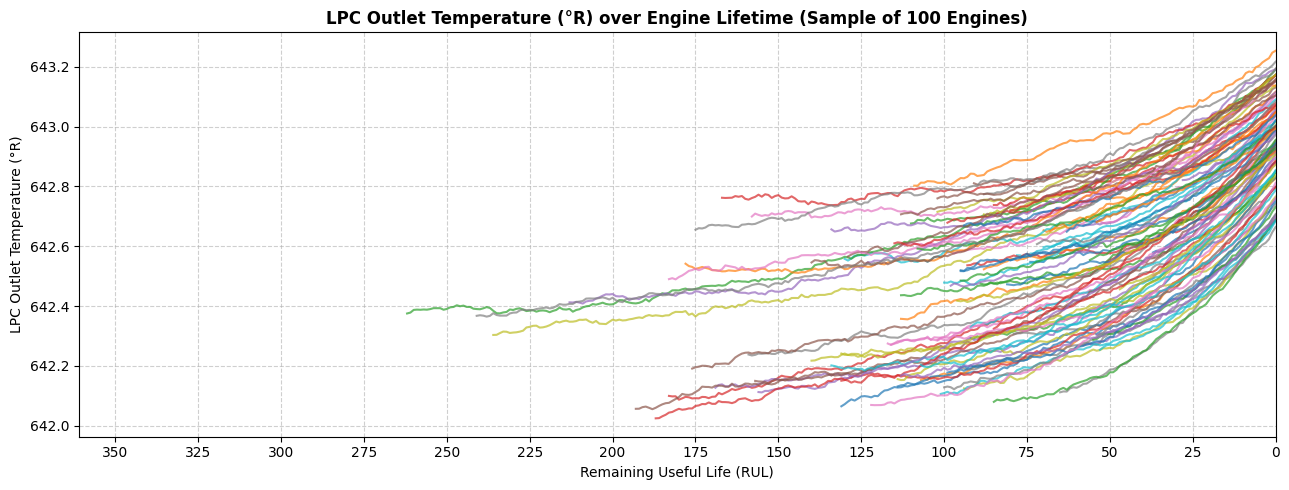

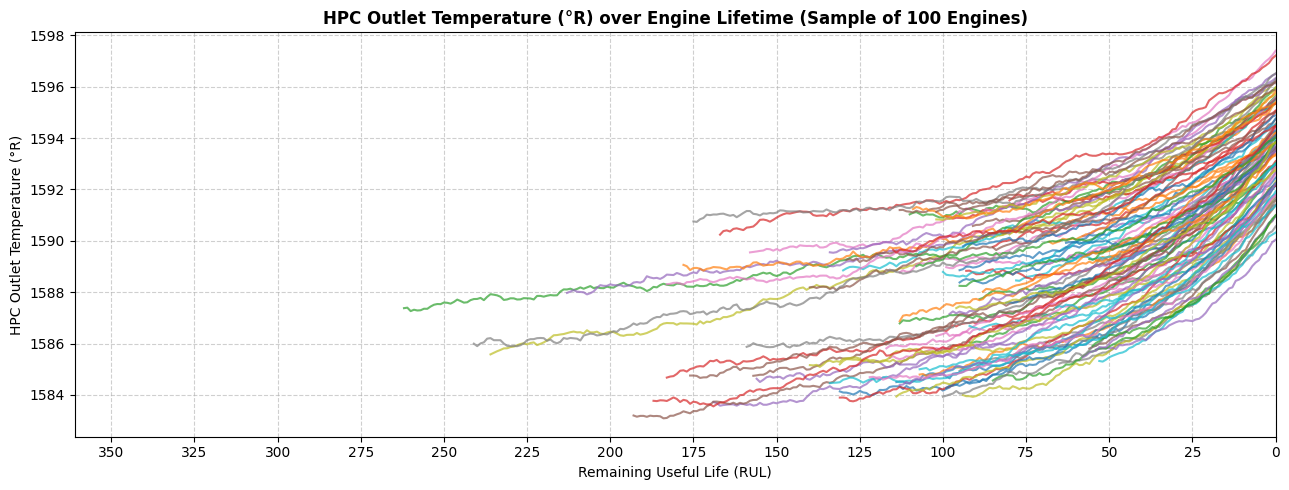

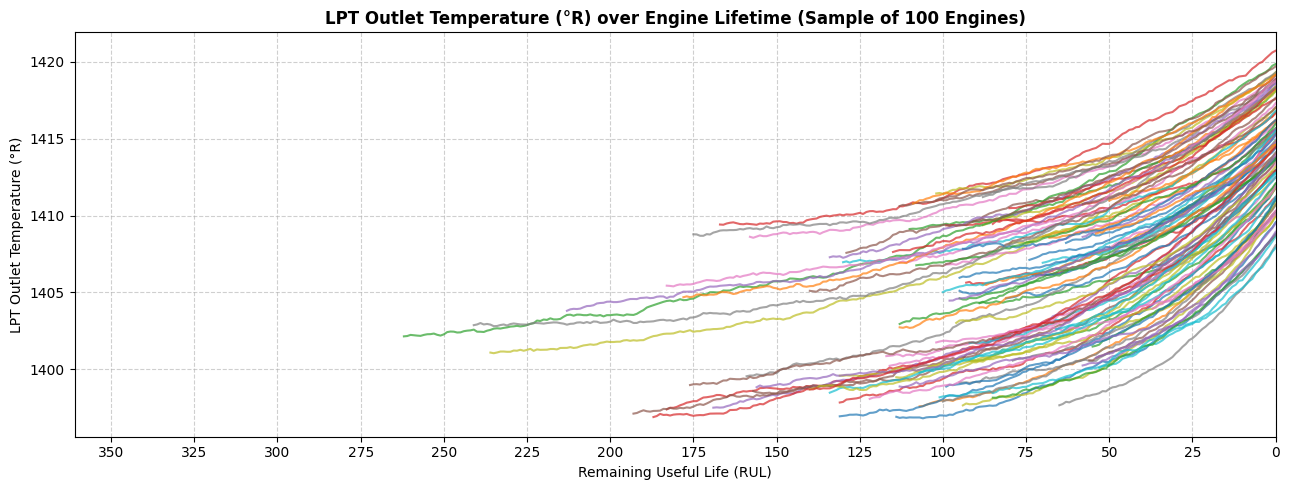

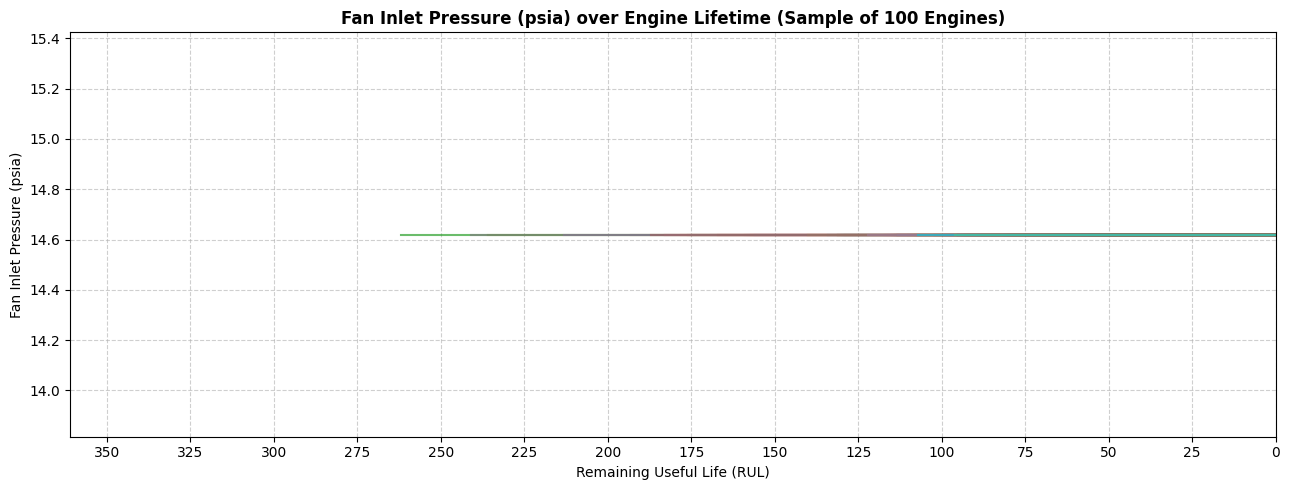

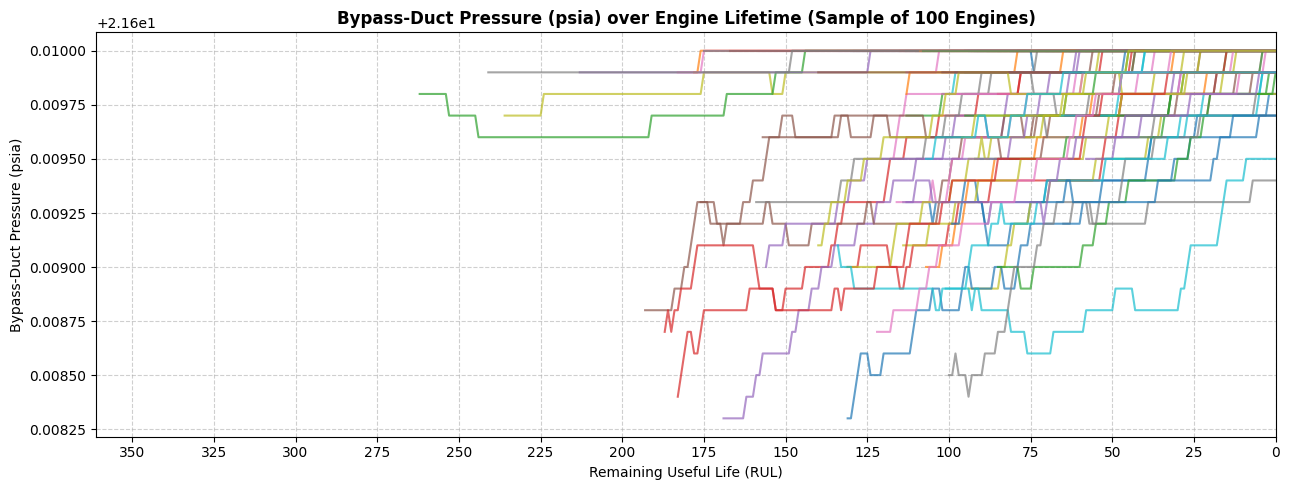

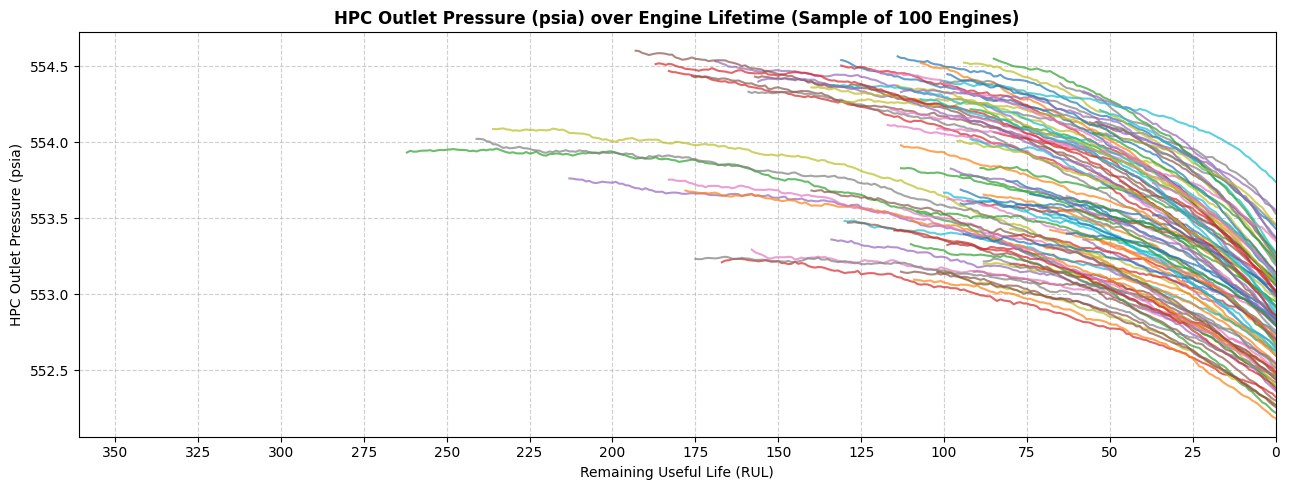

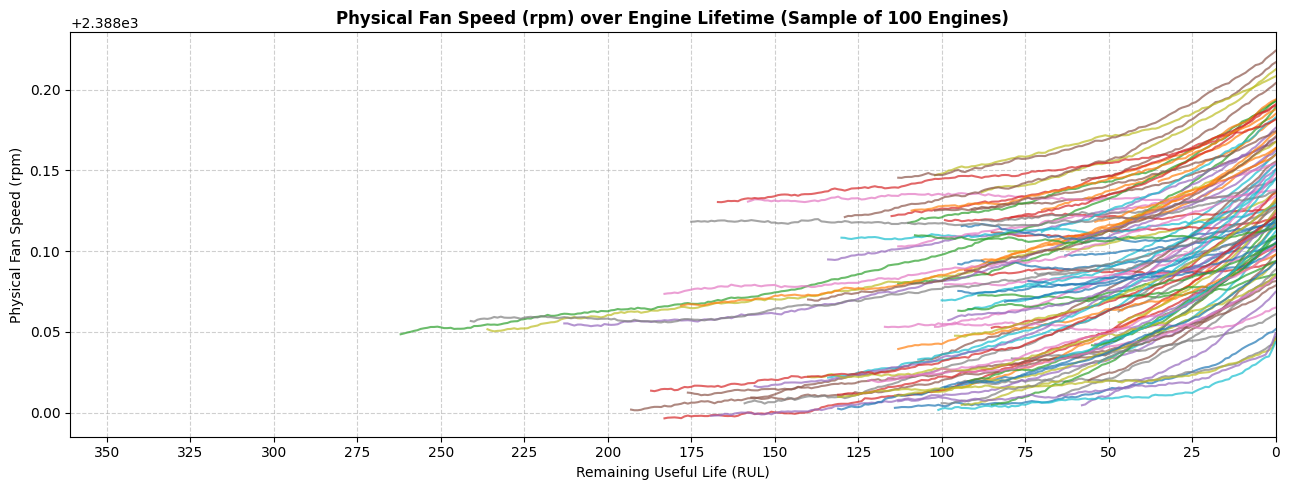

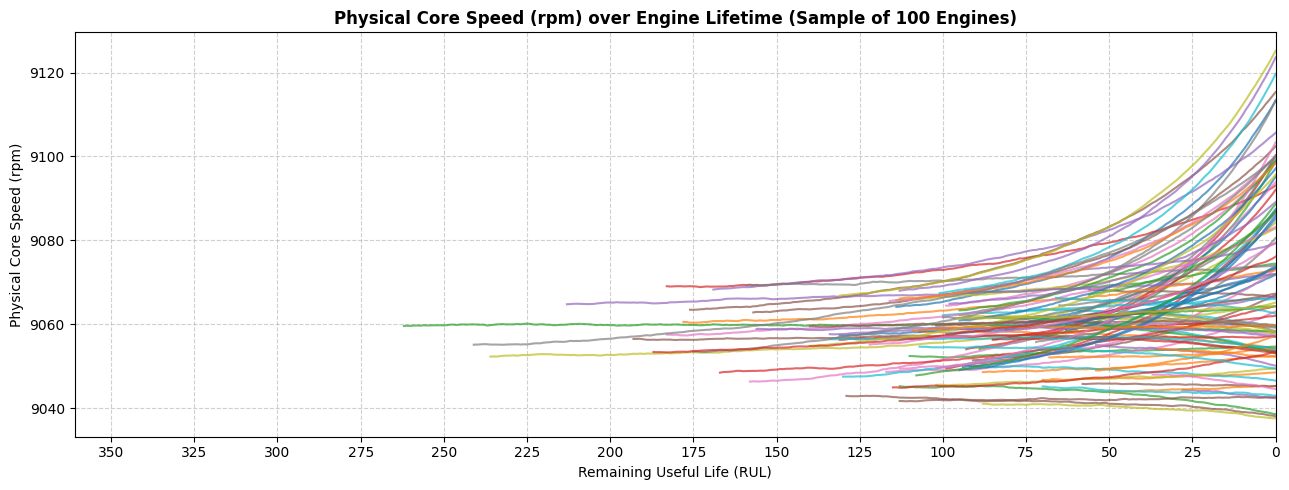

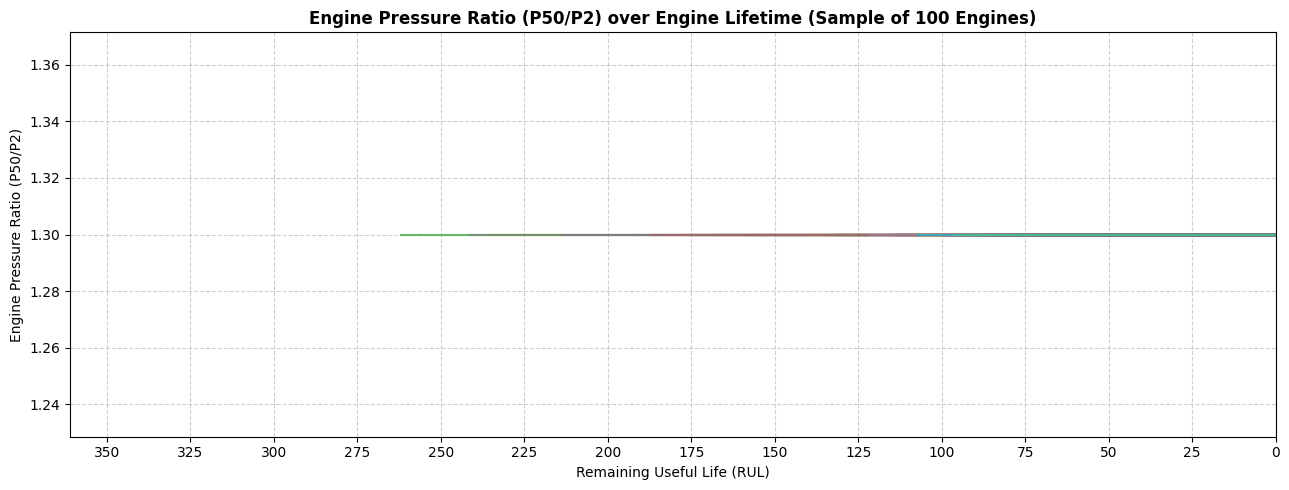

Skipping Ps30: 'Ps30'


<Figure size 1300x500 with 0 Axes>

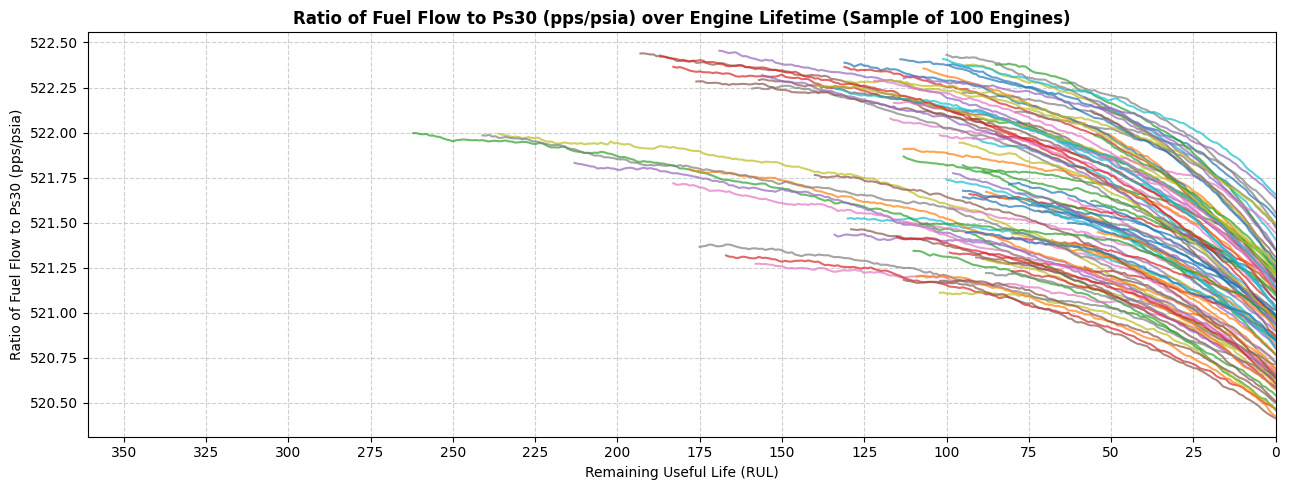

Skipping NRf: 'NRf'
Skipping NRc: 'NRc'


<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

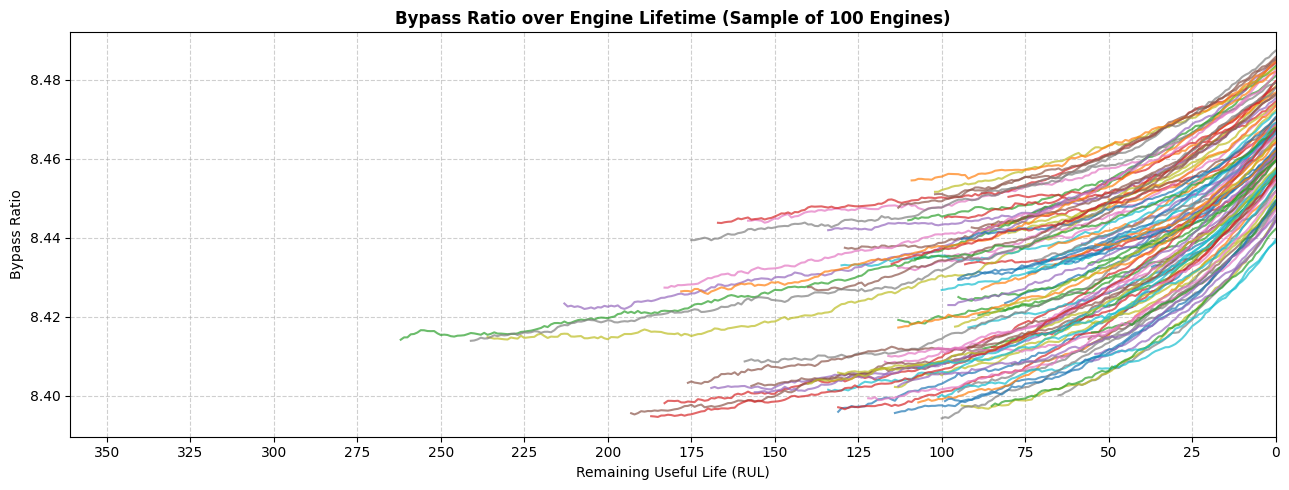

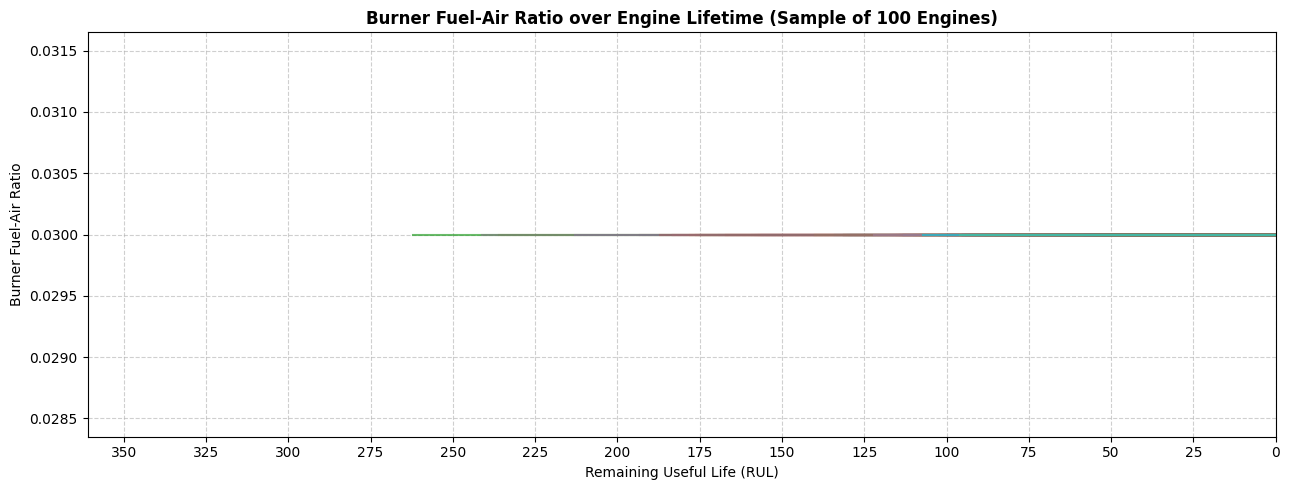

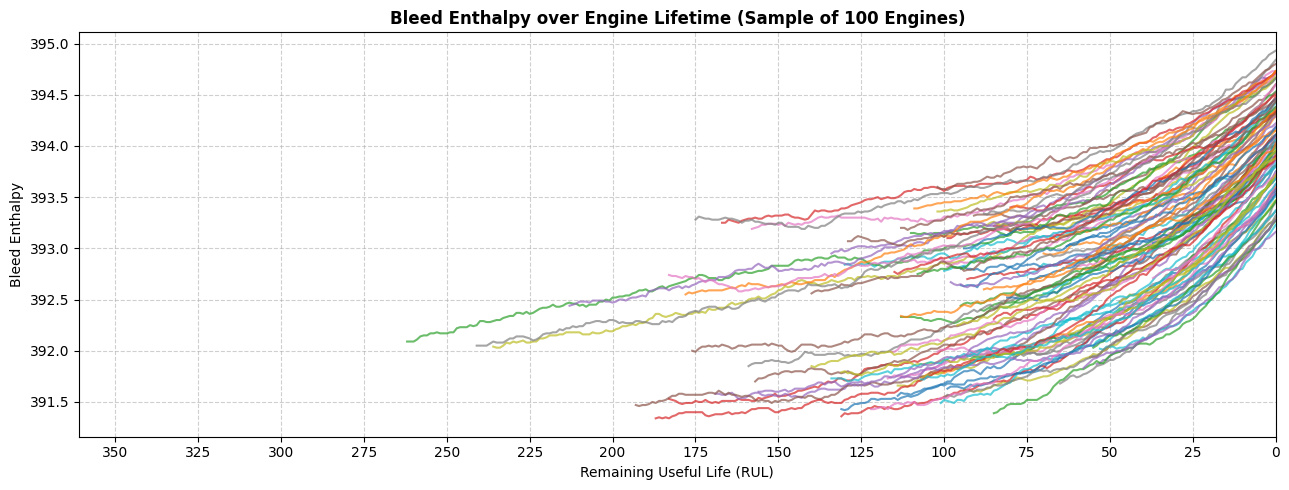

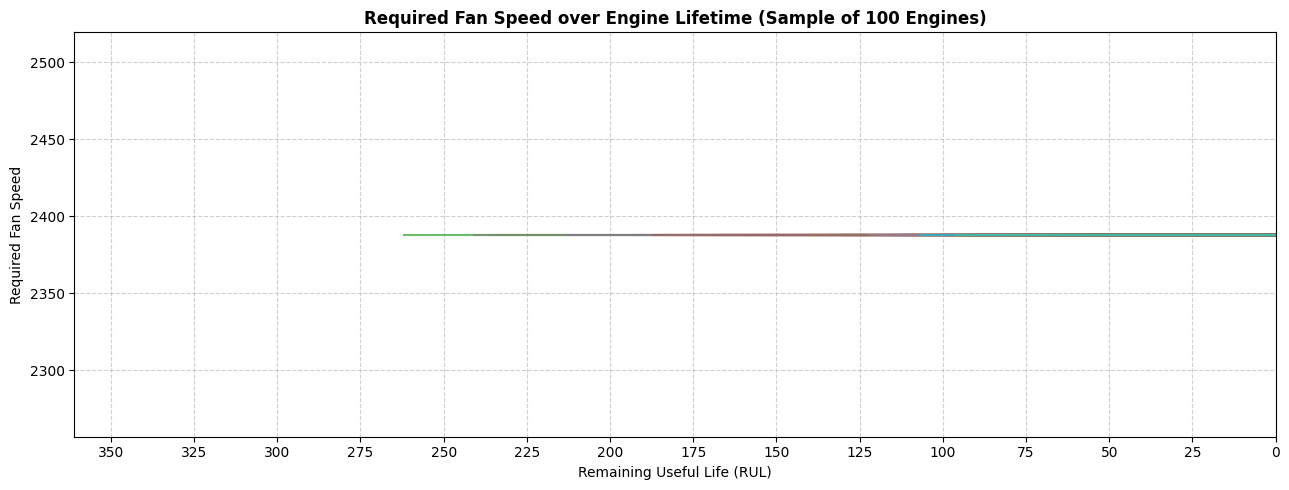

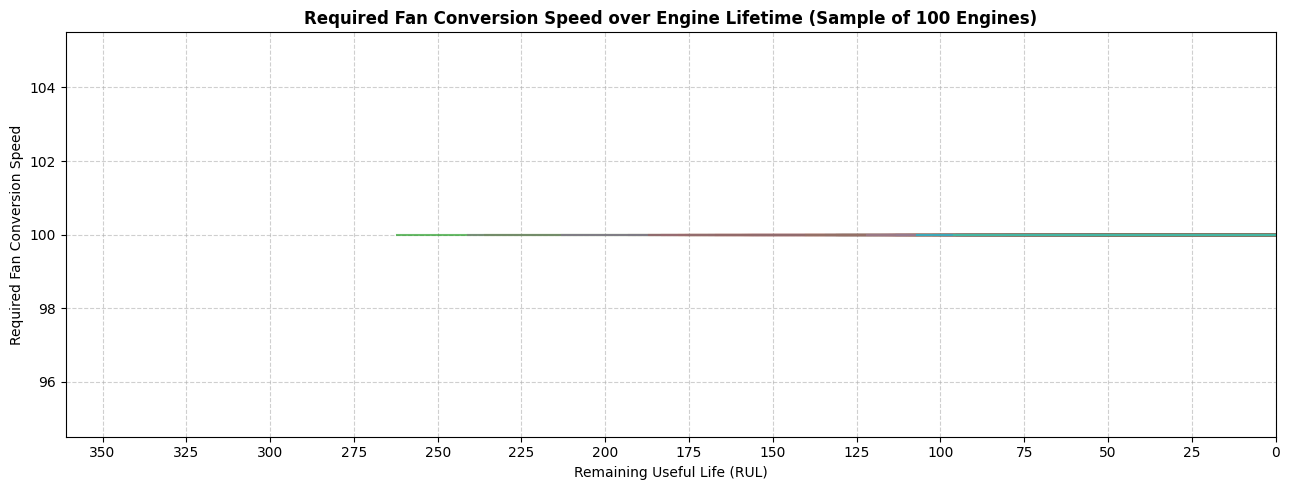

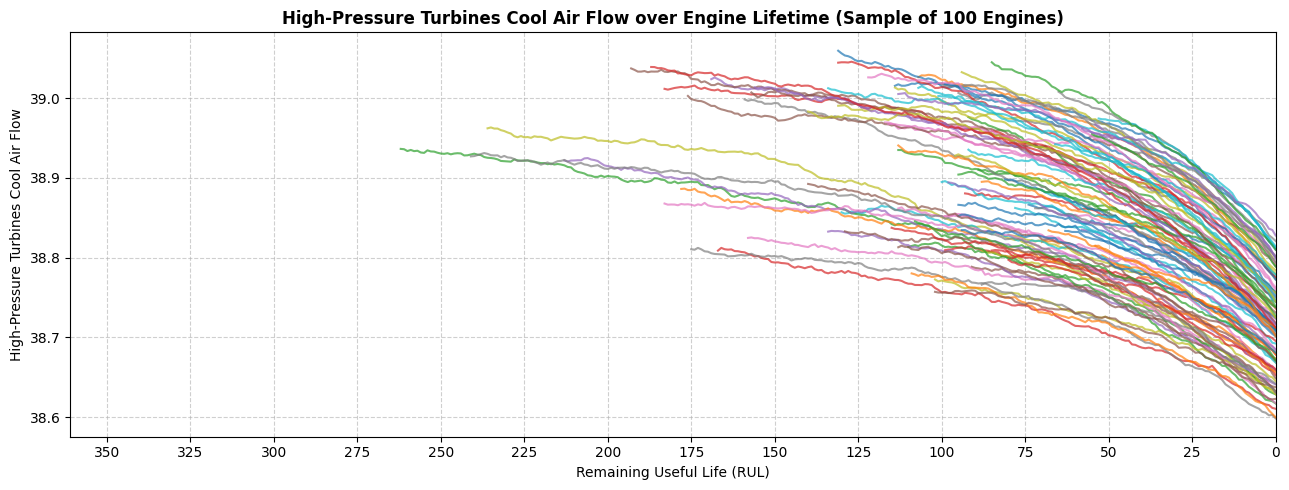

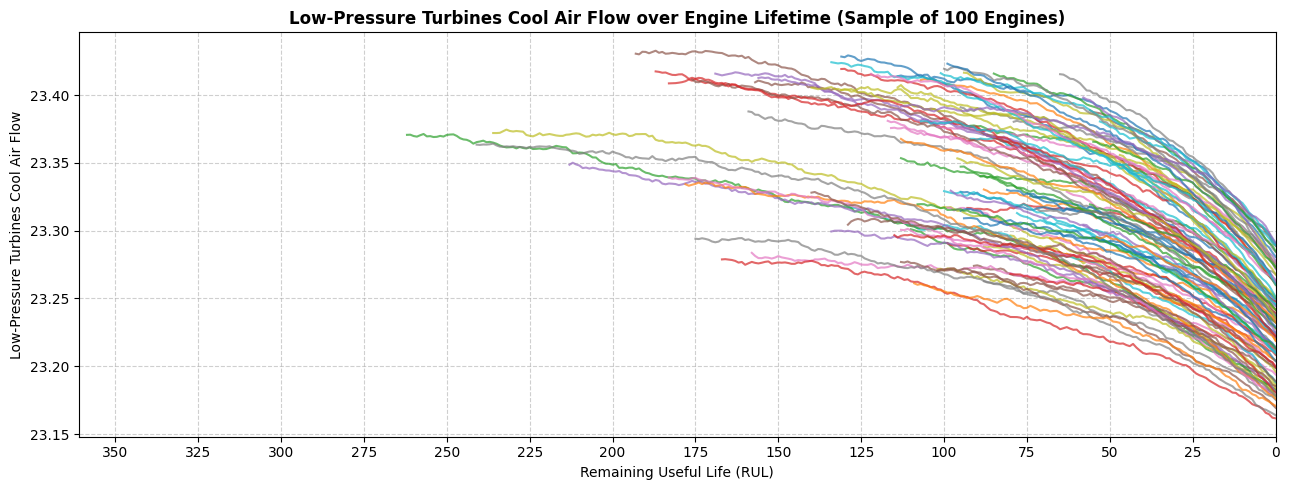

In [174]:
# Fix random seed for reproducibility
random.seed(42)

# Sample once — same 50 engines for all sensors
sampled_units = random.sample(list(df['unit'].unique()), min(709, len(df['unit'].unique())))
max_rul_in_sample = df[df['unit'].isin(sampled_units)]['RUL'].max()

def plot_signal(df, Sensor_dic, signal_name, sampled_units, max_rul_in_sample):
    plt.figure(figsize=(13, 5))
    
    # Use raw values (no normalization)
    df['plot_value'] = df[signal_name]
    ylabel = Sensor_dic.get(signal_name, signal_name)
    
    # Plot each sampled engine
    for i in sampled_units:
        subset = df[df['unit'] == i]
        plt.plot(
            subset['RUL'], 
            subset['plot_value'].rolling(100).mean(),
            alpha=0.7
        )

    # Reverse x-axis (RUL counts down to zero)
    plt.xlim(max_rul_in_sample, 0)
    plt.xticks(np.arange(0, max_rul_in_sample + 1, 25))
    plt.ylabel(ylabel)
    plt.xlabel('Remaining Useful Life (RUL)')
    plt.title(f"{Sensor_dic.get(signal_name, signal_name)} over Engine Lifetime (Sample of {len(sampled_units)} Engines)", 
              fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    plt.close()

# --- Loop through and plot all sensors ---
for sensor in sensor_columns:
    try:
        plot_signal(df, Sensor_dic, sensor, sampled_units, max_rul_in_sample)
    except Exception as e:
        print(f"Skipping {sensor}: {e}")


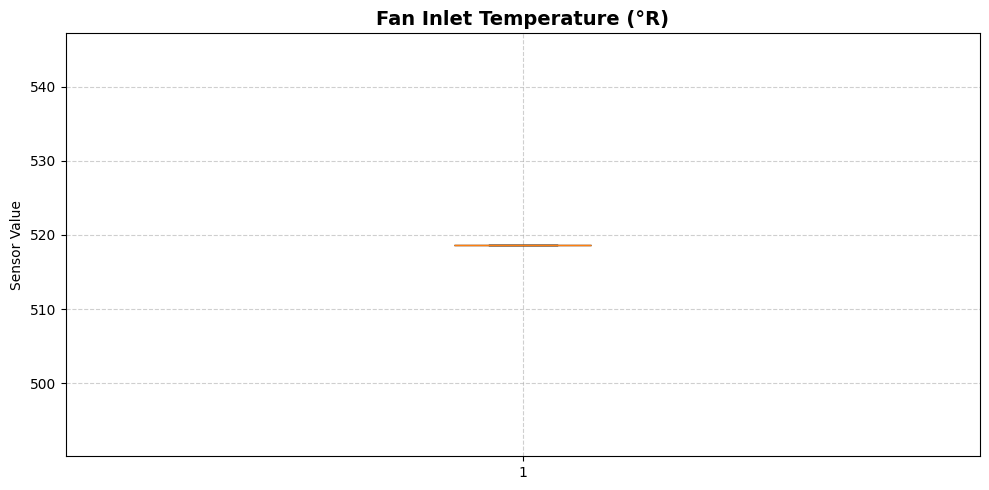

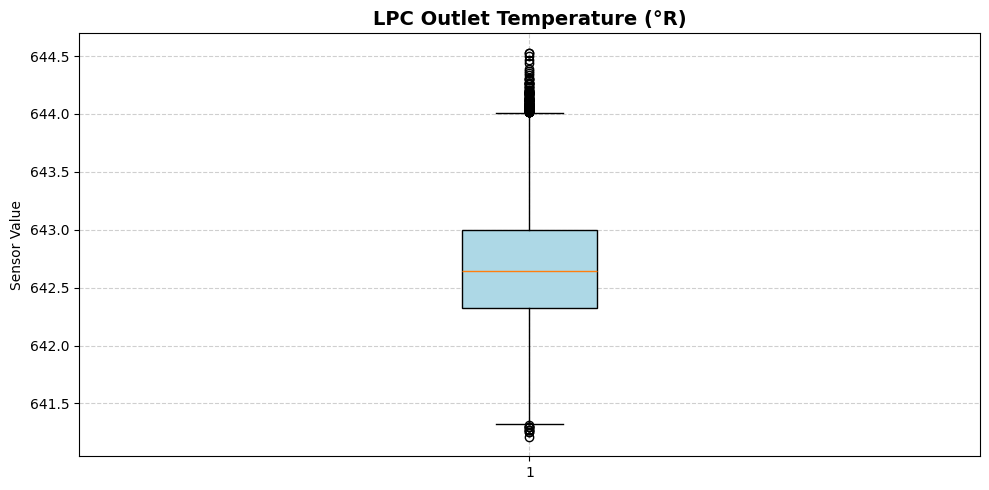

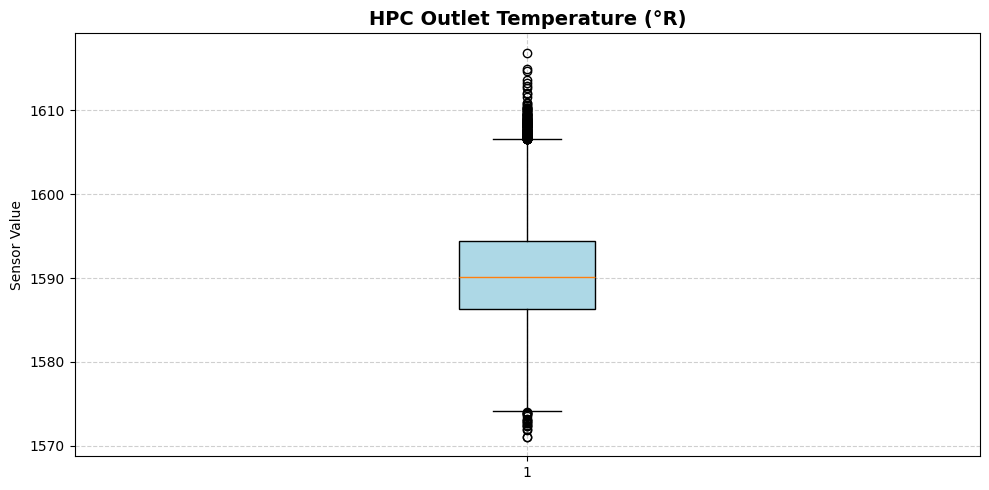

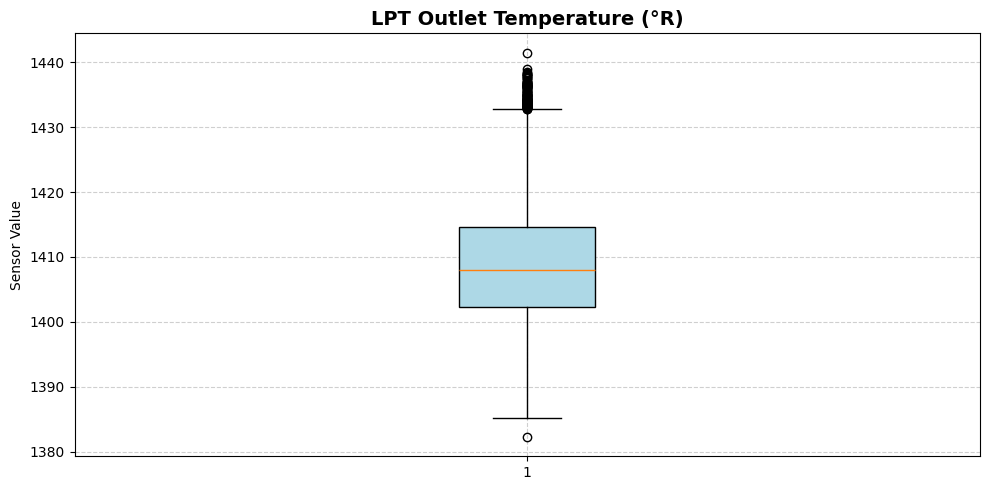

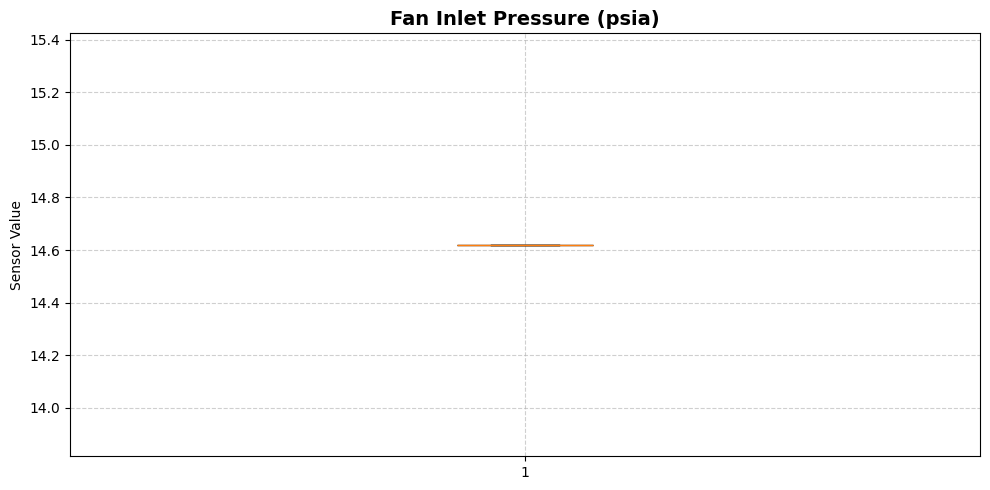

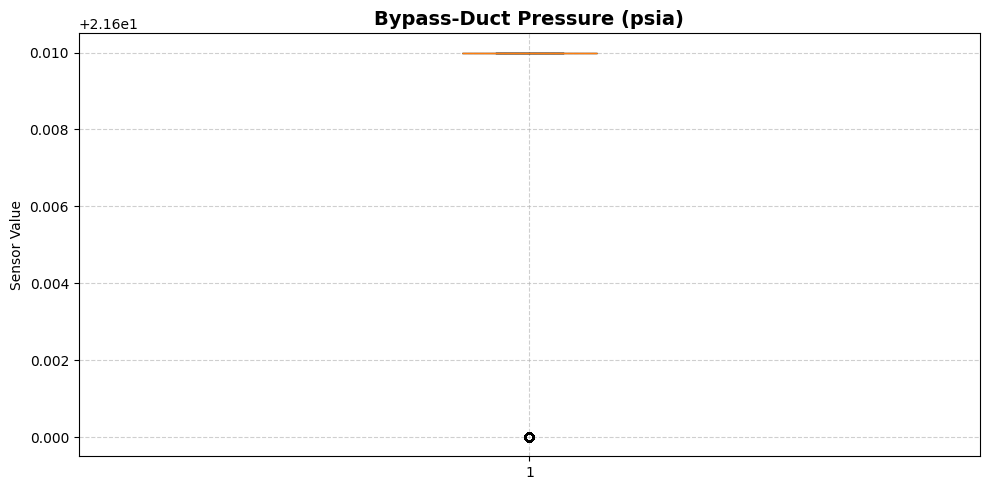

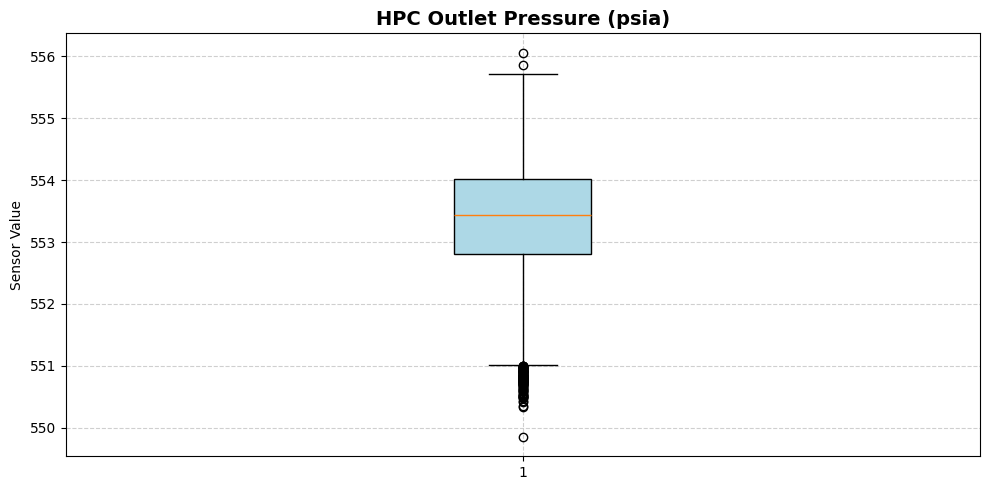

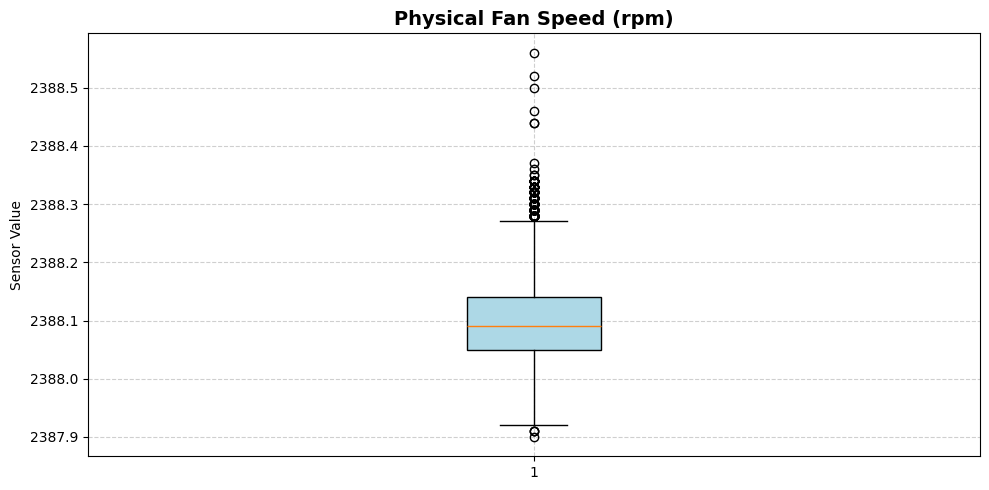

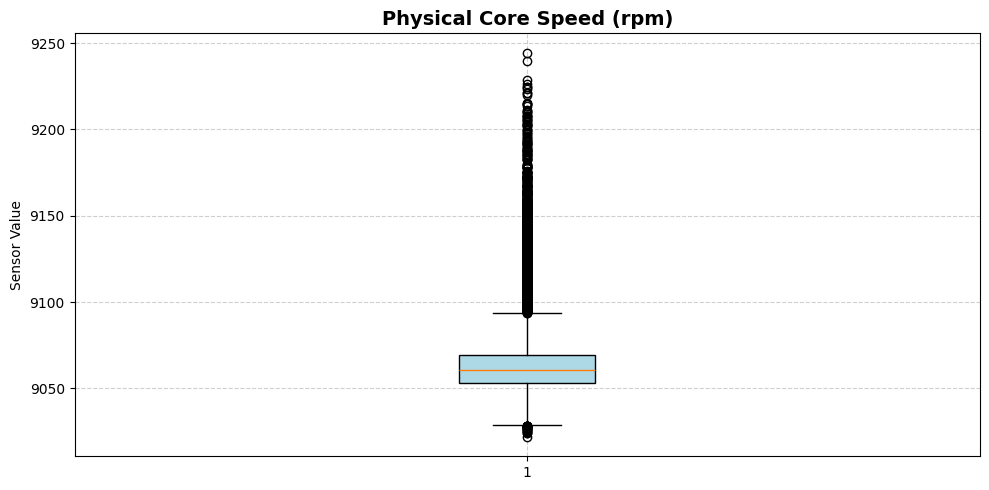

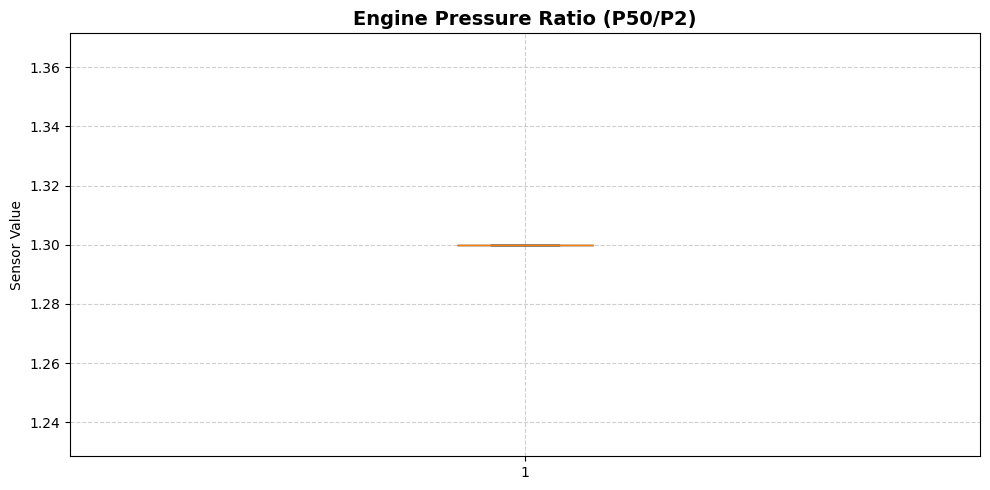

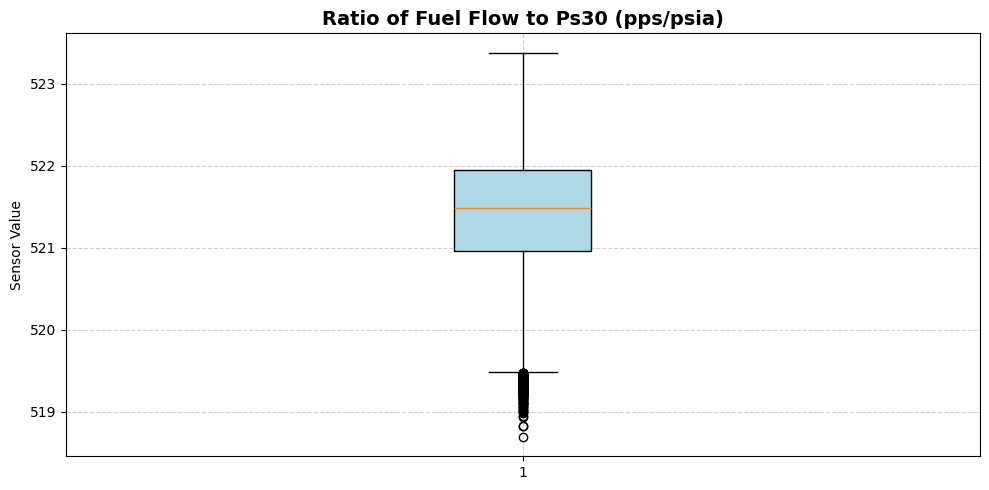

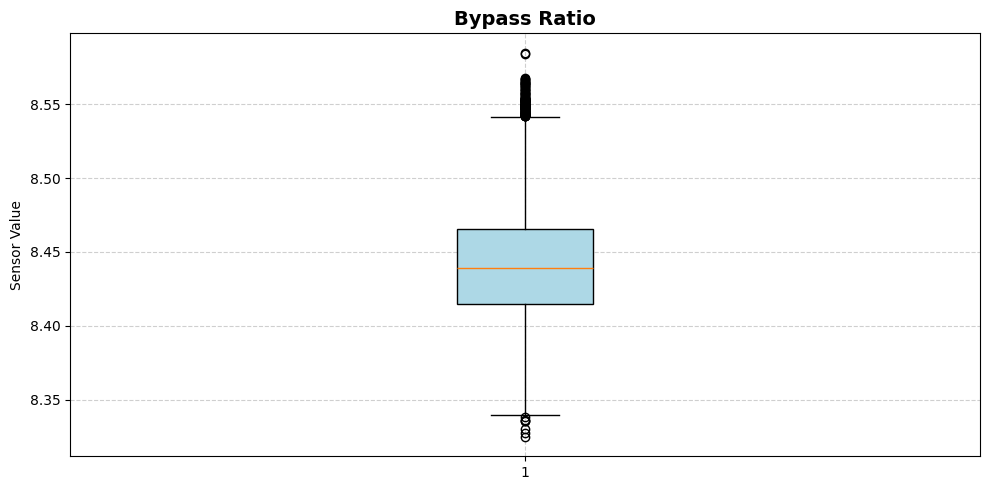

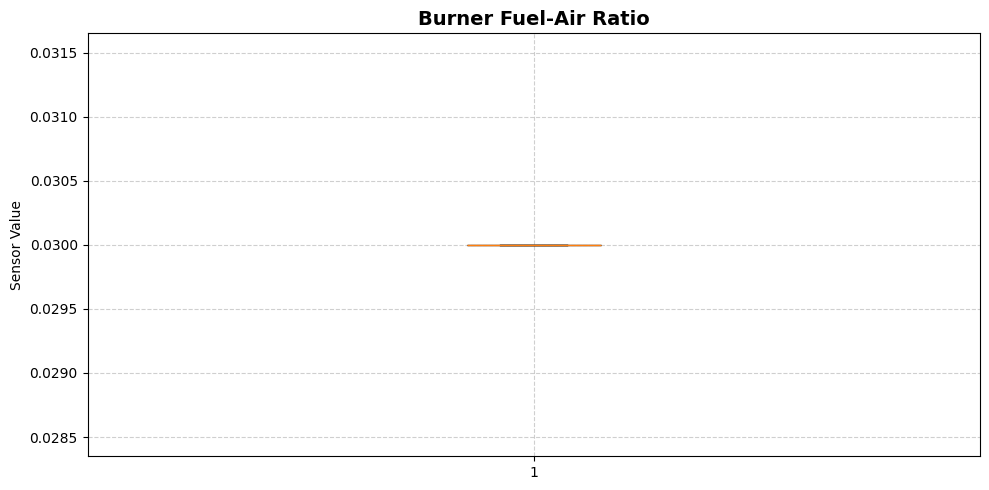

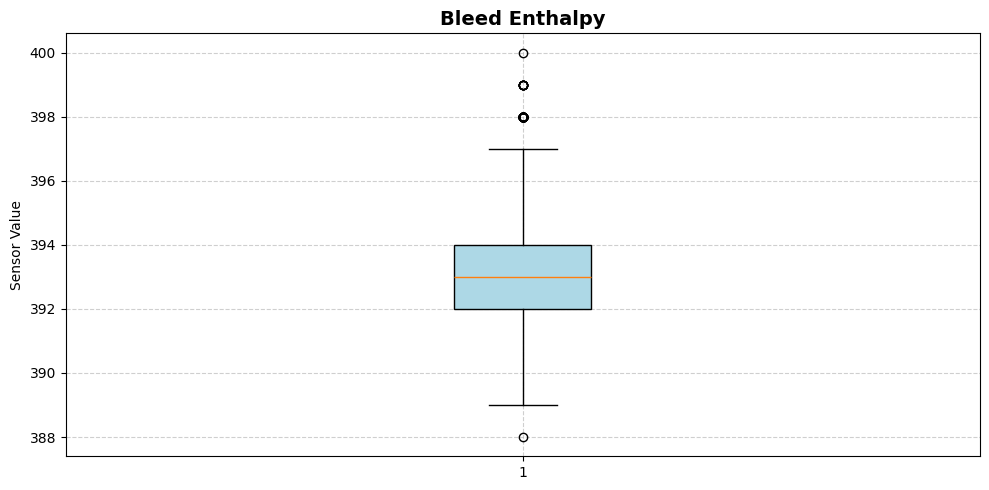

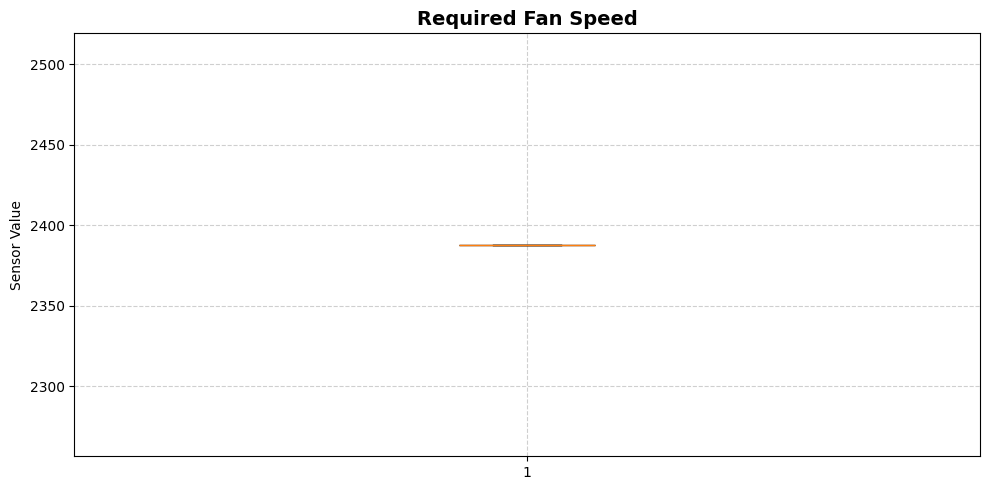

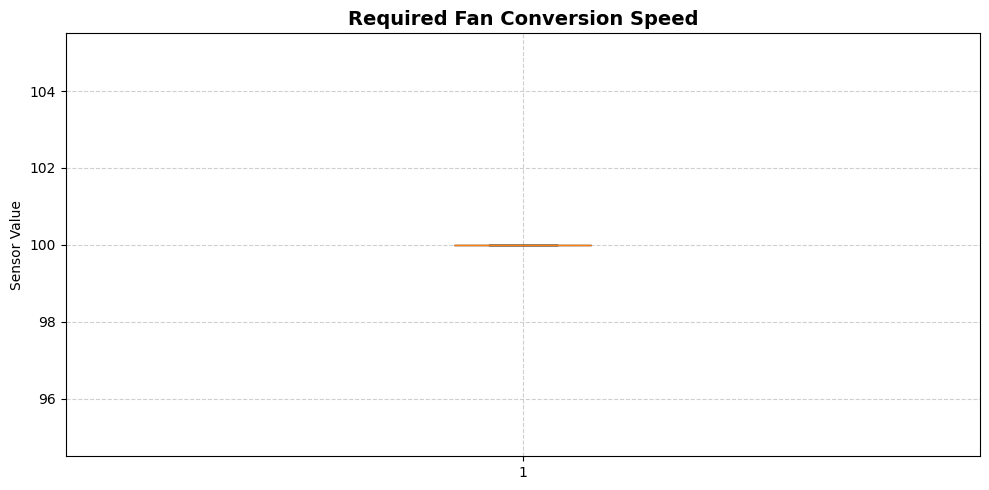

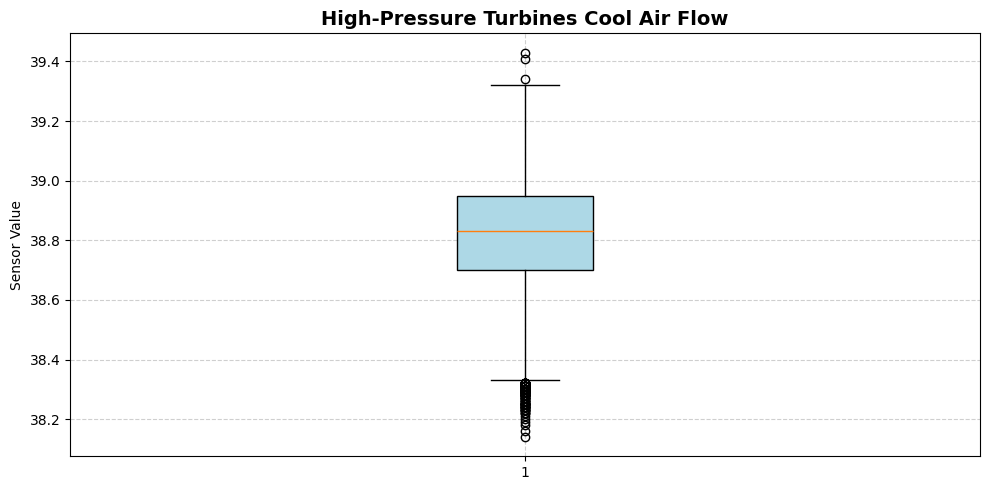

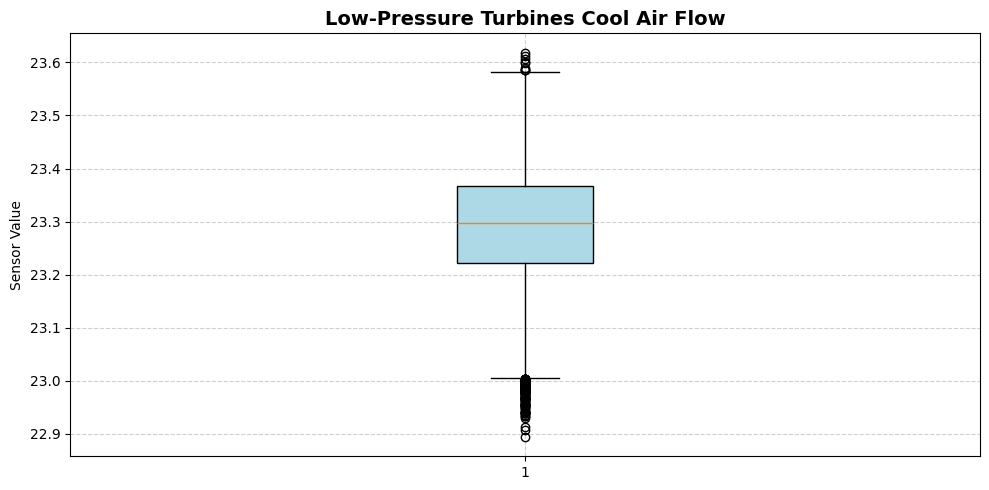

In [176]:
# Keep only sensors that are still present in df
sensor_columns = [c for c in sensor_columns if c in df.columns]

# Now plot safely
for sensor in sensor_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[sensor], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f"{Sensor_dic.get(sensor, sensor)}", fontweight='bold', fontsize=14)
    plt.ylabel('Sensor Value')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
# Columns to drop based on Sensor_dic keys
cols_to_drop = ['PCNfR_dmd', 'farB', 'Nf_dmd', 'epr', 'P2', 'T2']

# Drop them safely if they exist in df
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("Dropped columns:", [c for c in cols_to_drop if c not in df.columns])
print("Remaining columns:", df.columns.tolist())


Dropped columns: ['PCNfR_dmd', 'farB', 'Nf_dmd', 'epr', 'P2', 'T2']
Remaining columns: ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL', 'plot_value']


In [177]:
# After cleaning / dropping redundant features
df.to_parquet("datamart/silver/silver_feature_cleaned.parquet", index=False)


In [178]:
import pandas as pd

# Read just the schema (no data)
df = pd.read_parquet("datamart/silver/silver_feature_cleaned.parquet")
print(df.columns.tolist())


['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'phi', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32', 'RUL', 'plot_value']
